# Individual Tree Segmentation using watershed segmentation based top-edge-enhanced canopy height and density model in Broadleaf forest

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1fTZ-cptLAbT0UVkT0VfCUtkrBCiwBWiM?usp=sharing)

This notebook shows how to generate individual tree crowns from Airborne LiDAR data using watershed segmentation based top-edge-enhanced canopy height and density model in Broadleaf forest in Australia.

Make sure you use R runtime for this notebook. For Google Colab, go to `Runtime` -> `Change runtime type` and select `R` as the runtime type.

# 0 Prepare of LiDAR data processing environment

## 0.1 install all packages

In [1]:
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "3.1"

$year
[1] "2023"

$month
[1] "06"

$day
[1] "16"

$`svn rev`
[1] "84548"

$language
[1] "R"

$version.string
[1] "R version 4.3.1 (2023-06-16)"

$nickname
[1] "Beagle Scouts"

Installing lidR package... this step may take ~20mins, don't close your colab!!!

In [2]:
t1 <-Sys.time()
print(t1)
install.packages("lidR")
print(Sys.time()-t1)

[1] "2023-08-13 00:29:30 UTC"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘wk’, ‘e1071’, ‘htmlwidgets’, ‘s2’, ‘units’, ‘abind’, ‘lwgeom’, ‘classInt’, ‘lazyeval’, ‘raster’, ‘Rcpp’, ‘rgl’, ‘rlas’, ‘sf’, ‘sp’, ‘stars’, ‘terra’, ‘BH’, ‘RcppArmadillo’




Time difference of 28.91423 mins


In [8]:
t1 <-Sys.time()
print(t1)
install.packages("rgdal")
print(Sys.time()-t1)

[1] "2023-08-13 01:10:02 UTC"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Time difference of 23.05438 secs


In [3]:
t1 <-Sys.time()
print(t1)
install.packages("git2r")
print(Sys.time()-t1)

[1] "2023-08-13 00:58:25 UTC"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Time difference of 11.15191 secs


In [4]:
t1 <-Sys.time()
print(t1)
install.packages("future")
print(Sys.time()-t1)
library(future)

[1] "2023-08-13 00:58:36 UTC"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘globals’, ‘listenv’, ‘parallelly’




Time difference of 14.63803 secs


In [361]:
install.packages('plyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
install.packages("BiocManager")
library(BiocManager)

In [28]:
BiocManager::install("fftwtools")
#https://support.bioconductor.org/p/96366/

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'fftwtools'

Warning message in install.packages(...):
“installation of package ‘fftwtools’ had non-zero exit status”
Old packages: 'bit', 'bslib', 'cpp11', 'curl', 'devtools', 'gargle', 'gert',
  'highr', 'htmltools', 'isoband', 'openssl', 'purrr', 'roxygen2', 'tinytex',
  'whisker', 'xfun', 'boot', 'foreign', 'nlme'



In [32]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] BiocManager_1.30.22 rgdal_1.6-7         raster_3.6-23      
[4] sp_2.0-0            lidR_4.0.3          future_1.33.0      

loaded via a namespace (and not attached)

In [38]:
system('sudo apt-get install libfftw3-dev')

In [39]:
system('sudo apt-get install libfftw3-dev libfftw3-doc')

In [40]:
install.packages("fftwtools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [41]:
library(fftwtools)

In [42]:
#https://bioconductor.org/packages/devel/bioc/vignettes/EBImage/inst/doc/EBImage-introduction.html#1_Getting_started
t1 <-Sys.time()
print(t1)
BiocManager::install("EBImage")
library(EBImage)
print(Sys.time()-t1)

[1] "2023-08-13 01:39:42 UTC"


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'EBImage'

Old packages: 'bit', 'bslib', 'cpp11', 'curl', 'devtools', 'gargle', 'gert',
  'highr', 'htmltools', 'isoband', 'openssl', 'purrr', 'roxygen2', 'tinytex',
  'whisker', 'xfun', 'boot', 'foreign', 'nlme'


Attaching package: ‘EBImage’


The following objects are masked from ‘package:raster’:

    flip, rotate


The following object is masked from ‘package:lidR’:

    watershed




Time difference of 15.14392 secs


In [201]:
t1 <-Sys.time()
print(t1)
install.packages("spatstat")
library(spatstat)
print(Sys.time()-t1)

[1] "2023-08-13 04:00:54 UTC"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deldir’, ‘polyclip’, ‘spatstat.sparse’, ‘goftest’, ‘tensor’, ‘spatstat.data’, ‘spatstat.geom’, ‘spatstat.random’, ‘spatstat.explore’, ‘spatstat.model’, ‘spatstat.linnet’, ‘spatstat.utils’


Loading required package: spatstat.data

Loading required package: spatstat.geom

spatstat.geom 3.2-4


Attaching package: ‘spatstat.geom’


The following objects are masked from ‘package:EBImage’:

    affine, closing, distmap, opening, rotate


The following objects are masked from ‘package:raster’:

    area, rotate, shift


The following objects are masked from ‘package:lidR’:

    area, is.empty, npoints


Loading required package: spatstat.random

spatstat.random 3.1-5

Loading required package: spatstat.explore

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:raster’:

    getData


spatstat.explore 3.2-1

Loading requir

Time difference of 3.196724 mins


In [363]:
install.packages('rgeos')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [364]:
library(spatstat)
library(sf)
library(sp)
library(raster)
library(lidR)
library(rgdal)
library(plyr)
library(stringr)
library(EBImage)
library(rgeos)
library(ggplot2)
library(rgdal)

rgeos version: 0.6-4, (SVN revision 699)
 GEOS runtime version: 3.10.2-CAPI-1.16.0 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 GEOS using OverlayNG
 Linking to sp version: 2.0-0 
 Polygon checking: TRUE 



Attaching package: ‘rgeos’


The following object is masked from ‘package:rgl’:

    triangulate


The following object is masked from ‘package:EBImage’:

    translate




## 0.2 download sample data

In [43]:
dir.create('/content/ITD')

In [44]:
setwd('/content/ITD')

In [45]:
getwd()

[1] "/content/ITD"

In [46]:
list.dirs()

[1] "."

In [47]:
# Replace the URL with the repository you want to clone
repo_url <- "https://github.com/ruizhuj/Individual_Tree_Delineation_in_Broadleaf_forest"

# Clone the repository
git2r::clone(repo_url, local_path = "Individual_Tree_Delineation_in_Broadleaf_forest")

cloning into 'Individual_Tree_Delineation_in_Broadleaf_forest'...
Receiving objects:   1% (1/52),   11 kb
Receiving objects:  11% (6/52),   11 kb
Receiving objects:  21% (11/52),   11 kb
Receiving objects:  32% (17/52),   11 kb
Receiving objects:  42% (22/52),   19 kb
Receiving objects:  51% (27/52), 18759 kb
Receiving objects:  61% (32/52), 18759 kb
Receiving objects:  71% (37/52), 18759 kb
Receiving objects:  82% (43/52), 18759 kb
Receiving objects:  92% (48/52), 18759 kb
Receiving objects: 100% (52/52), 18759 kb, done.


Local:    main /content/ITD/Individual_Tree_Delineation_in_Broadleaf_forest
Remote:   main @ origin (https://github.com/ruizhuj/Individual_Tree_Delineation_in_Broadleaf_forest)
Head:     [49cc378] 2023-08-13: Delete test

In [48]:
list.files()

[1] "Individual_Tree_Delineation_in_Broadleaf_forest"

In [49]:
setwd('./Individual_Tree_Delineation_in_Broadleaf_forest')

In [50]:
getwd()

[1] "/content/ITD/Individual_Tree_Delineation_in_Broadleaf_forest"

In [51]:
list.files('./data')

[1] "merged.laz"            "Plot1_Valid_Cover.cpg" "Plot1_Valid_Cover.dbf"
[4] "Plot1_Valid_Cover.prj" "Plot1_Valid_Cover.sbn" "Plot1_Valid_Cover.sbx"
[7] "Plot1_Valid_Cover.shp" "Plot1_Valid_Cover.shx"

## 0.3 prepare all functions for ITD

In [731]:
HCBM <- function(chm){
  chmf3max <- raster::focal(chm, w = matrix(1,3,3), fun = max, na.rm = TRUE,pad=TRUE)
  HCBM = (chmf3max >= 45)*(chmf3max* 0.4 + 1.2)+15*(chmf3max <45)
  return(HCBM)
}

In [732]:
gap_mask <- function(raster,nb,a=0.25,b=0.05){ # nb is the neighborhood range
  res <- res(raster)[1]
  n <- as.integer(nb/res) + 1
  r_fmean <- raster::focal(raster, w = matrix(1,n,n), fun = mean, na.rm = TRUE,pad=TRUE)
  r_fsd <- raster::focal(raster, w =  matrix(1,n,n), fun = sd, na.rm = TRUE,pad=TRUE)
  tr <- as.data.frame(raster)[,1]
  tr <- tr[!is.na(tr)]
  tr <- tr[tr>0]
  tr <- quantile(tr, b)
  mask = (raster - (r_fmean - r_fsd*a) <0) |(raster<tr)
  mask[is.na(mask[])] <- 0
  mask <- raster::focal(mask, w = matrix(1,3,3), fun = min, na.rm = TRUE,pad=TRUE)
  mask<- resample(mask, raster, method = 'bilinear')
  return(mask)
}

In [733]:
smooth_ms <- function(raster,nb=3,a=0.25,b=0.95,c=1.5){ # nb is the neighborhood range
  res <- res(raster)[1]
  n <- as.integer(nb/res) + 1
  r_fmean <- raster::focal(raster, w = matrix(1,n,n), fun = mean, na.rm = TRUE,pad=TRUE)
  r_fsd <- raster::focal(raster, w =  matrix(1,n,n), fun = sd, na.rm = TRUE,pad=TRUE)
  tr <- as.data.frame(raster)[,1]
  tr <- tr[!is.na(tr)]
  tr <- tr[tr>0]
  tr <- quantile(tr, b)
 # print(tr)
  pits = ((raster - (r_fmean + r_fsd*a)) >= 0) * (raster>tr)
  pits[is.na(pits[])] <- 0
  pits <- raster::focal(pits, w = matrix(1,3,3), fun = max, na.rm = TRUE,pad=TRUE)
  pits<- resample(pits, raster, method = 'bilinear')

  S1= pits*(r_fmean-c*r_fsd) + (1-pits)*raster
  S1 = S1 * (S1>=0)
  smooth = raster::focal(S1, w = matrix(1,3,3), fun = mean, na.rm = TRUE,pad=TRUE)
  return(smooth)
}

In [734]:
reclass_laz <- function(laz,chm,HCBM,gap=gap_20m){
  chmf3max <- raster::focal(chm, w = matrix(1,3,3), fun = max, na.rm = TRUE,pad=TRUE)
  HCBM_gap <- gap * chmf3max + (1 - gap) * HCBM
  HCBM_gap[is.na(HCBM_gap[])] <- 0
  HCBM_gap[is.infinite(HCBM_gap[])] <- 0

  laz_rmCBM <- laz-HCBM_gap
  ms_laz <- filter_poi(laz_rmCBM,Z< -1 | Classification == 2)
  ms_laz@data$Z <- ms_laz@data$Zref
  rm(laz_rmCBM)
  ms_chm <- rasterize_canopy(ms_laz, 0.5, p2r())
  ms_schm= smooth_ms(ms_chm)

  ms_schm_fmax <- gap*chmf3max+(1-gap)*raster::focal((ms_schm+2), w = matrix(1,3,3), fun = max, na.rm = TRUE,pad=TRUE)
  ms_schm_fmax[is.na(ms_schm_fmax[])] <- 0
  ms_schm_fmax[is.infinite(ms_schm_fmax[])] <- 0

  laz_reclass <- laz-ms_schm_fmax
  ms_laz <- filter_poi(laz_reclass,Z< 1 & Z>=-15 & Classification != 2 & Zref <30)
  ms_laz@data$Classification <- 6
  os_laz <- filter_poi(laz_reclass,Z >=1 & Classification != 2)
  os_laz@data$Classification <- 15
  laz_reclass <- rbind(os_laz,ms_laz,filter_poi(laz_reclass,Classification == 2))
  laz_reclass@data$Z <- laz_reclass@data$Zref
  rm(ms_laz,os_laz)

  return(laz_reclass)
}

In [735]:
DHPM <- function(os_laz,os_chm,cz = 0.5,r=3){
  extent <- extent(raster(os_chm))
  x_left <- extent[1]
  x_right <- extent[2]
  y_bottom <- extent[3]
  y_top <- extent[4]
  # Create a window using the extracted coordinates
  window <- owin(xrange = c(x_left, x_right), yrange = c(y_bottom, y_top))
  os_ppp <- ppp(x = os_laz@data$X, y = os_laz@data$Y,window = window, check = T)
  DHP<- raster(density(os_ppp,sigma=cz*r, eps=cz,edge=T))#, kernel = "quartic"
  return(DHP)
}

In [736]:
f <- function(x) {
  y <- 2.6 * (-(exp(-0.08*(x-2)) - 1)) + 3
  y[x < 2] <- 3
  y[x > 20] <- 5
  return(y)
}

#heights <- seq(-5,30,0.5)
#ws <- f(heights)
#plot(heights, ws, type = "l",  ylim = c(0,5))

In [737]:
ttops_raster <- function(raster,geopnts){
  r <- raster(ncol=ncol(raster), nrow=nrow(raster))
  extent(r) <- extent(raster)
  crs(r) <- raster@crs
  ttops_r <- rasterize(as.data.frame(st_coordinates(geopnts))[,1:2], r,  field = geopnts$Z, fun=max, background=0)
  w3 <- matrix(c(0,1,0,1,1,1,0,1,0), nr=3,nc=3)
  ttops_r_fmax <- as.integer(raster::focal(ttops_r, w = w3, fun = max, na.rm = TRUE)>=2)
  #ttops_r_fmax <- raster::focal(ttops_r_fmax, w = matrix(1,3,3), fun = max, na.rm = TRUE)
  return(ttops_r_fmax)
}

In [738]:
edge<- function(raster,nb=5,a=0.5,b=3){
  res <- res(raster)[1]
  n <- as.integer(nb/res) + 1
  AOC <- terrain(raster, opt = "aspect")
  SOA <- terrain(AOC, opt = "slope")

  reAOC <- terrain((maxValue(raster)-raster), opt = "aspect")
  reSOA <- terrain(reAOC, opt = "slope")

  AdSOA = ((SOA+reSOA) * 0.5 - abs(SOA-reSOA) * 0.5)
  AdSOA_fmean <- raster::focal(AdSOA, w = matrix(1,n,n), fun = mean, na.rm = TRUE,pad=TRUE)
  AdSOA_fsd <- raster::focal(AdSOA, w = matrix(1,n,n), fun = sd, na.rm = TRUE,pad=TRUE)


  r_fmean <- raster::focal(raster, w = matrix(1,n,n), fun = mean, na.rm = TRUE,pad=TRUE)
  ridge =as.integer(((raster - r_fmean)>0.5)* ((AdSOA - (AdSOA_fmean-AdSOA_fsd*a))>0))
  edge <- (1-ridge)*as.integer(((raster - r_fmean) < -0.5)* ((AdSOA - (AdSOA_fmean-AdSOA_fsd/b))>0))
  #w3 <- matrix(c(0,1,0,1,1,1,0,1,0), nr=3,nc=3)
  #edge <- raster::focal(edge, w = w3, fun = min, na.rm = TRUE,pad=TRUE)
  edge[edge == 0] <- NA
  return(edge)
}

In [739]:
thin_edge<- function(edge,raster){
  polygons <- rasterToPolygons(edge)#, dissolve = TRUE
  buffer_polygons <- gBuffer(polygons, byid = F, joinStyle='ROUND',mitreLimit=5,width = 0.5)
  shrunken_polygons <- gBuffer(buffer_polygons, byid =F, width = -1)
  # Rasterize the polygons into the empty raster
  thin_edge <- rasterize(shrunken_polygons, raster, field = 1)
  return(thin_edge)
}

## 0.4 check whole las file

In [740]:
laz <- readLAS('./data/merged.laz')

In [741]:
print(laz)

class        : LAS (v1.3 format 1)
memory       : 183.5 Mb 
extent       : 370859.9, 371168.4, 5847678, 5848068 (xmin, xmax, ymin, ymax)
coord. ref.  : GDA94 / MGA zone 55 
area         : 122268 m²
points       : 3.44 million points
density      : 28.1 points/m²
density      : 11.44 pulses/m²


# 1 reclassify LiDAR points for overstorey and understorey canopy breaking from overstorey canopy base height

## 1.1 create a layer of canopy height model

In [742]:
table(laz@data$Classification)


      2       3       4       5       8 
 410710  292193  583888 1594961  554328 

In [743]:
laz <- filter_poi(laz, Classification %in% c(2,3,4,5,8))

In [744]:
chm <- rasterize_canopy(laz, 0.5, pitfree(subcircle = 0.2))

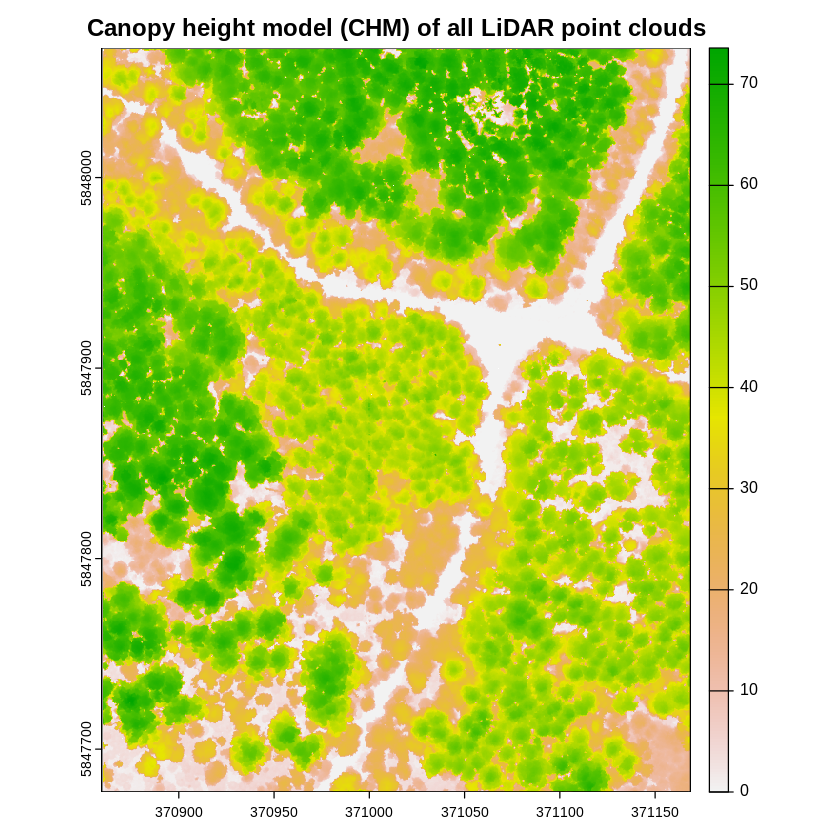

In [745]:
plot(chm, main = 'Canopy height model (CHM) of all LiDAR point clouds')

## 1.2 create a layer of crown base height without forest gaps

### 1.2.1 Create a height to crown base model (HCBM) based on HCB-HT relationship

In [746]:
HCBM_r <- HCBM(chm)

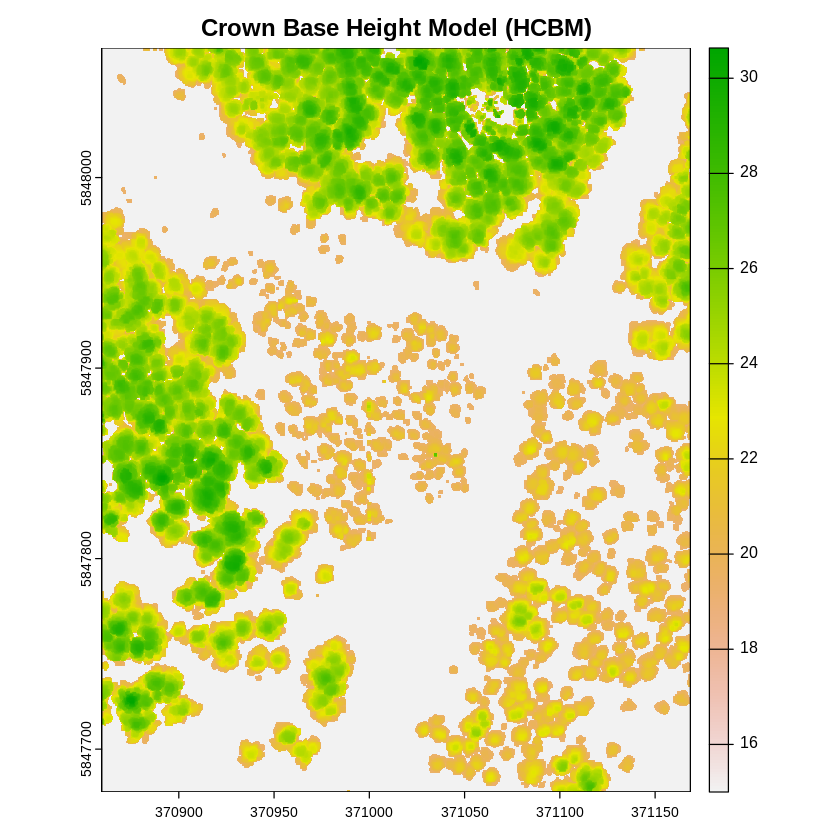

In [750]:
plot(HCBM_r, main = 'Crown Base Height Model (HCBM)')

### 1.2.2 identify forest gap

In [751]:
gap_20m <- gap_mask(chm,20)

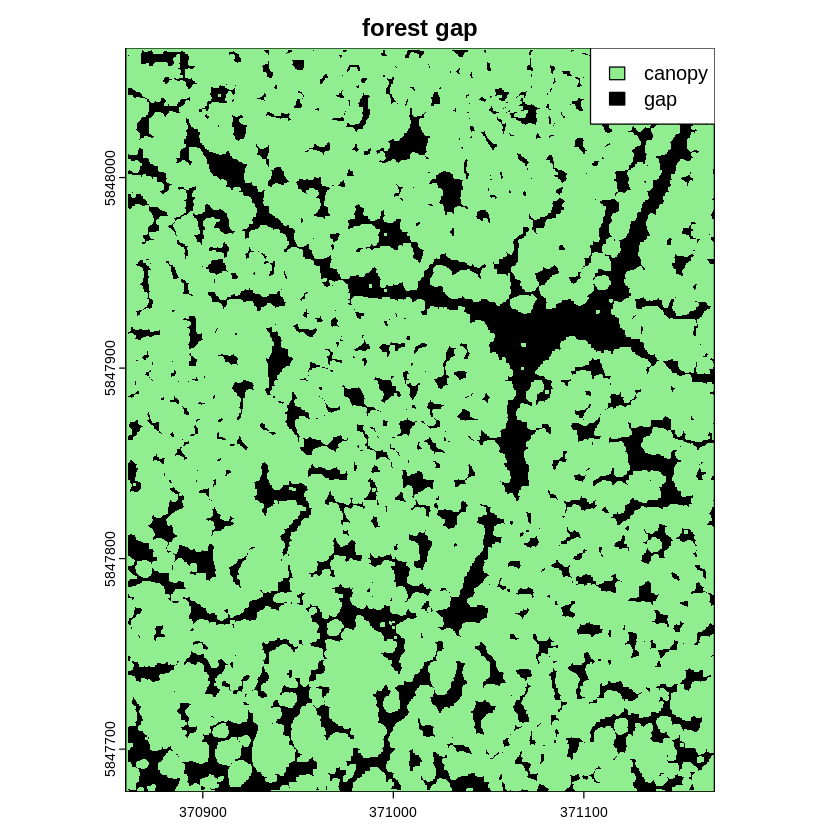

In [752]:
colors <- c("lightgreen", "black")
plot(gap_20m, main = 'forest gap', col = colors, legend = FALSE)
legend(x= ext(chm)[2]-65,y = ext(chm)[4], legend = c("canopy", "gap"), fill = colors)

## 1.3 reclassify Lidar points

In [754]:
laz_reclass <- reclass_laz(laz,chm,HCBM_r,gap=gap_20m)

In [685]:
writeLAS(laz_reclass, './TEwatershed_output/L01_reclassLaz.las')

### check the reclassified LiDAR points

In [763]:
sample_transact <- function(x0,y0,dy=2,dx=60){
  ymin = y0 - dy
  ymax = y0 + dy
  xmin = x0 - dx
  xmax = x0 + dx
  sample_transact <- sf::st_polygon(list(cbind(c(xmin, xmax, xmax, xmin, xmin), c(ymin, ymin, ymax, ymax, ymin))))
  return(sample_transact)
}
sample_roi <- sample_transact(x0=371048.5,y0=5847992.5)

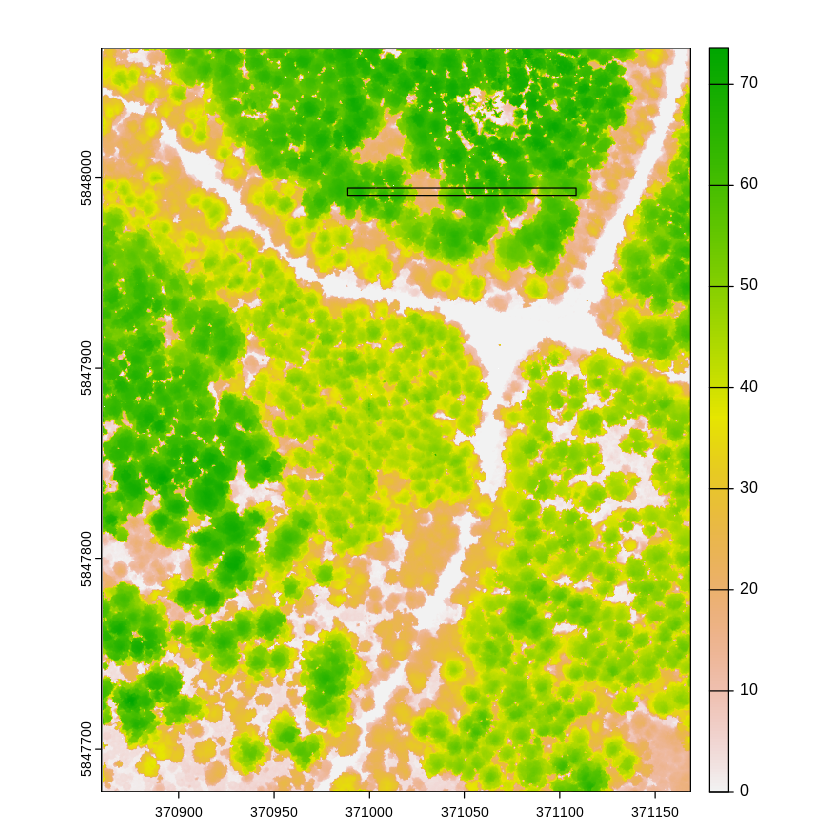

In [765]:
# Create a polygon using the sf package
plot(chm)
plot(sample_roi,add=T)

In [766]:
# Clip the LAS data using the polygon
sample_laz <- clip_roi(laz_reclass, sample_roi)

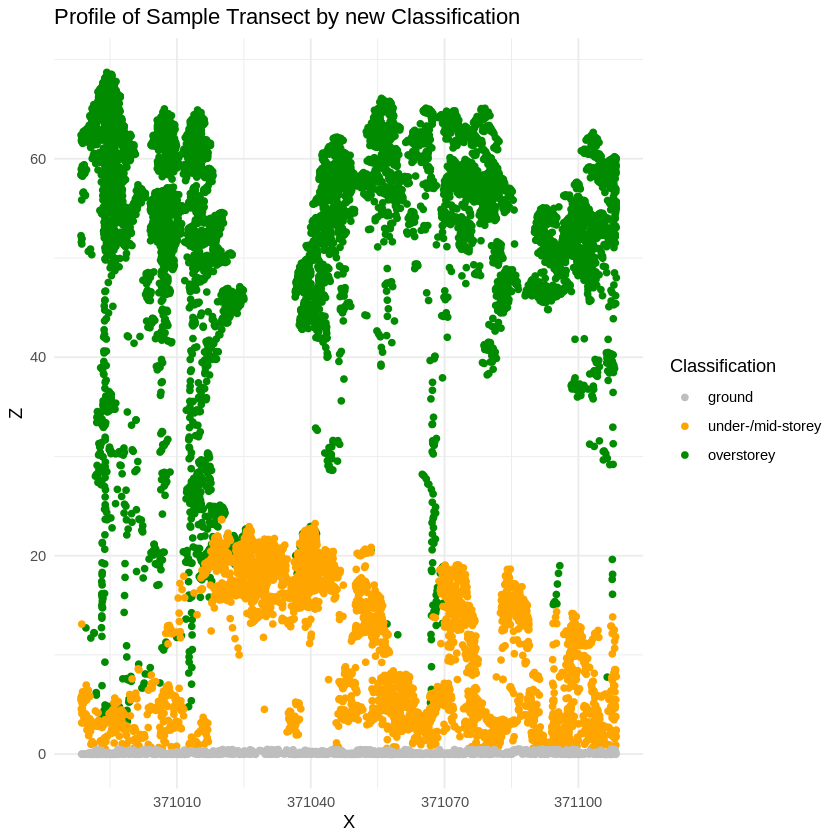

In [767]:
# Create the ggplot plot
# Define the custom labels for Classification values
custom_labels <- c("2" = "ground", "6" = "under-/mid-storey", "15" = "overstorey")

ggplot(sample_laz@data, aes(x = X, y = Z, color = factor(Classification))) +
  geom_point() +
 # scale_color_discrete(name = "Classification") +
 scale_color_manual(name = "Classification", values = c("2" = "grey", "6" = "orange", "15" = "green4"),
                     labels = custom_labels) +
  labs(title = "Profile of Sample Transect by new Classification") +
  theme_minimal()

# 2 identify tree tops, crown edges and forest gaps for overstorey canopy

## 2.1 create a layer of density of high points (DHP) from overstorey LiDAR points

In [768]:
os_chm <- rasterize_canopy(filter_poi(laz_reclass,Classification != 6), 0.5, pitfree(subcircle = 0.2))
os_laz = filter_poi(laz_reclass,Classification == 15)

Warning message:
“data contain duplicated points”


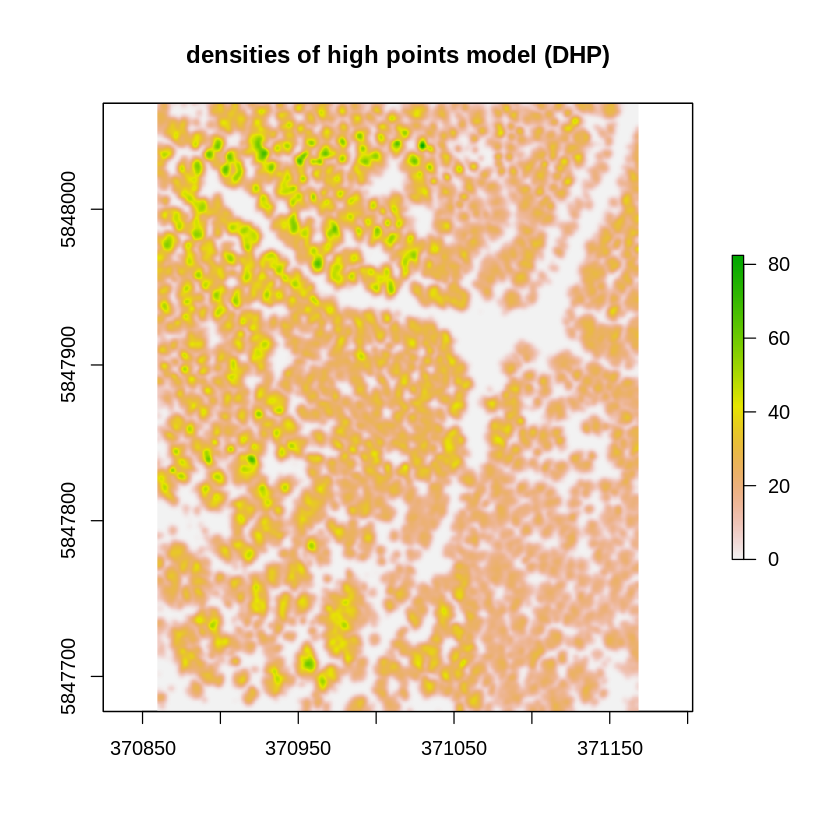

In [769]:
DHP<- DHPM(os_laz,os_chm)
plot(DHP,main='densities of high points model (DHP)')

## 2.2 detect the tree tops for overstorey crowns using localmax method

In [770]:
DHP<- raster::resample(DHP, raster(os_chm), method = 'bilinear')

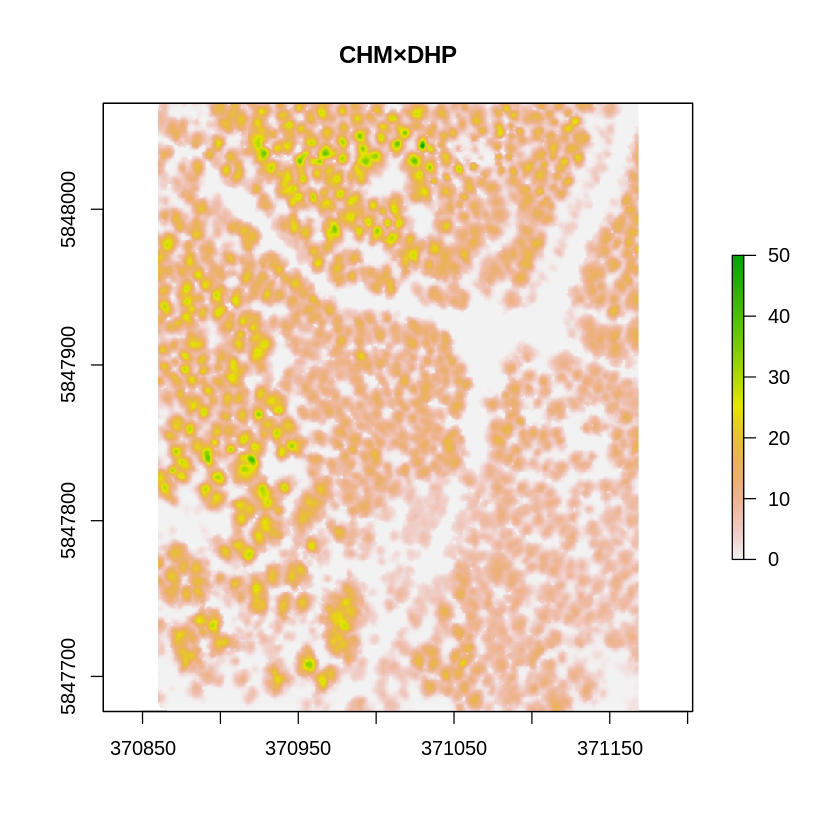

In [771]:
DHPCHM = raster(os_chm) * DHP
DHPCHM <- DHPCHM / maxValue(DHPCHM) * 50
plot(DHPCHM, main = 'CHM×DHP')

In [699]:
#dir.create(outdir)
f = './TEwatershed_output/B02_DHPCHM_basemap.tif'
writeRaster(DHPCHM ,f, overwrite=TRUE)

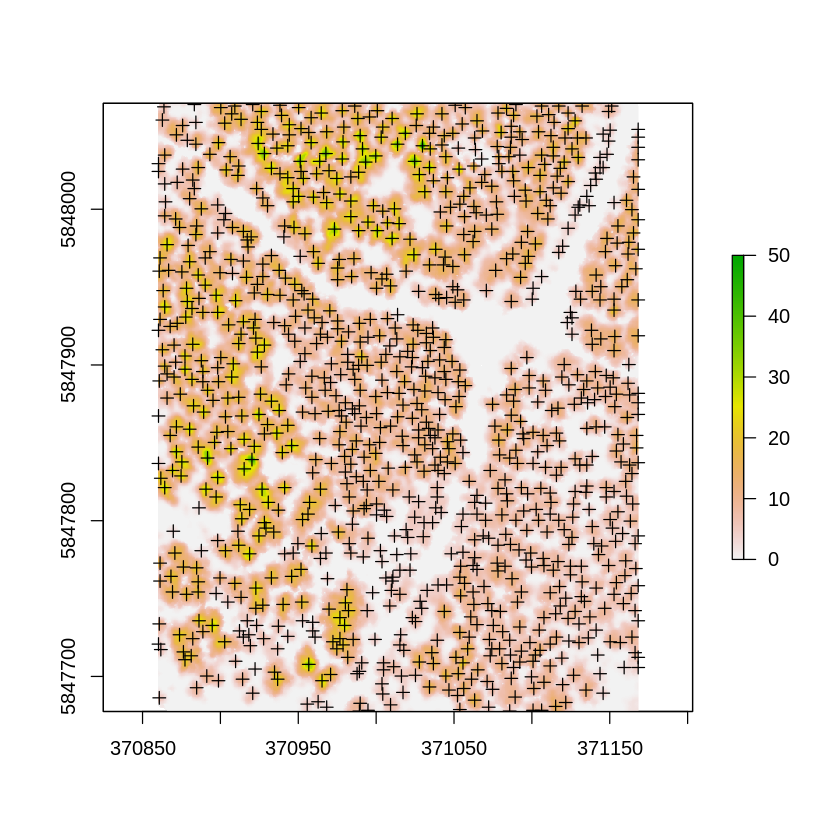

In [772]:
ttops_f <- locate_trees(DHPCHM, lmf(f))
plot(DHPCHM)
plot(sf::st_geometry(ttops_f), add = TRUE, pch = 3)

In [702]:
ttops_f$Z_backup <- ttops_f$Z
ttops_f_2d <- st_zm(ttops_f, NULL)
st_write(sf::st_as_sf(ttops_f_2d), dsn = outdir, layer = "T01_DHPCHM_ttops_f", driver = "ESRI Shapefile", overwrite = TRUE)

Writing layer `T01_DHPCHM_ttops_f' to data source 
  `./TEwatershed_output' using driver `ESRI Shapefile'
Writing 1046 features with 3 fields and geometry type Point.


In [774]:
ttops_r_fmax <- ttops_raster(DHPCHM,ttops_f)

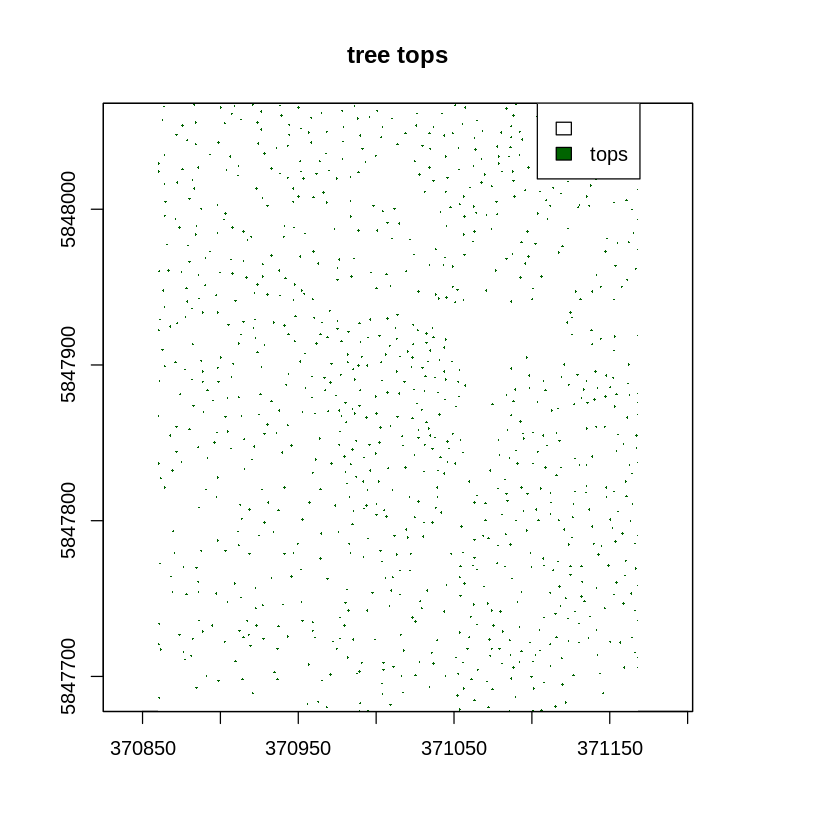

In [775]:
plot(ttops_r_fmax, main = 'tree tops', col = c('white','darkgreen'), legend = FALSE)
legend(x= ext(chm)[2]-65,y = ext(chm)[4], legend = c("", "tops"), fill = c('white','darkgreen'))

In [705]:
#dir.create(outdir)
f = './TEwatershed_output/T02_DHPCHM_ttops_fmax.tif'
writeRaster(ttops_r_fmax ,f, overwrite=TRUE)

## 2.3 delineate Crown Edge

Warning message:
“GEOS support is provided by the sf and terra packages among others”
Warning message:
“GEOS support is provided by the sf and terra packages among others”


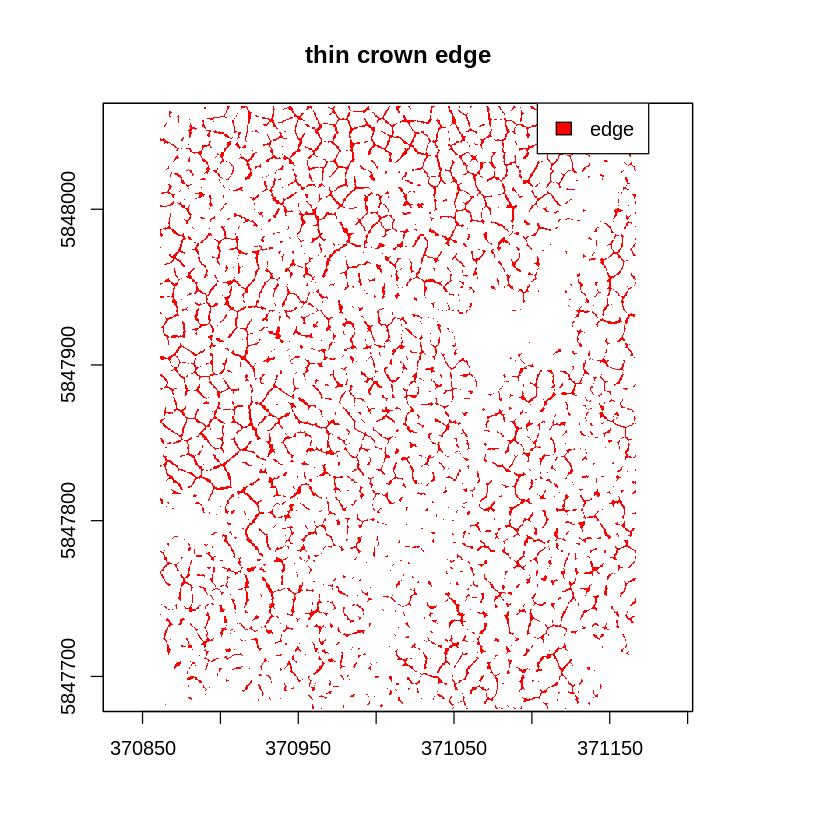

In [776]:
crown_edge <- edge(raster::focal(DHPCHM, w = matrix(1,3,3), fun = mean, na.rm = TRUE,pad=TRUE))
thin_edge <- thin_edge(crown_edge,DHPCHM)
colors <- c("red")
plot(thin_edge, main = 'thin crown edge', col = colors, legend = FALSE)
legend(x= ext(chm)[2]-65,y = ext(chm)[4], legend = c("edge"), fill = colors)

In [712]:
#dir.create(outdir)
f = './TEwatershed_output/E01_DHPCHM_thinEdge.tif'
writeRaster(thin_edge ,f, overwrite=TRUE)

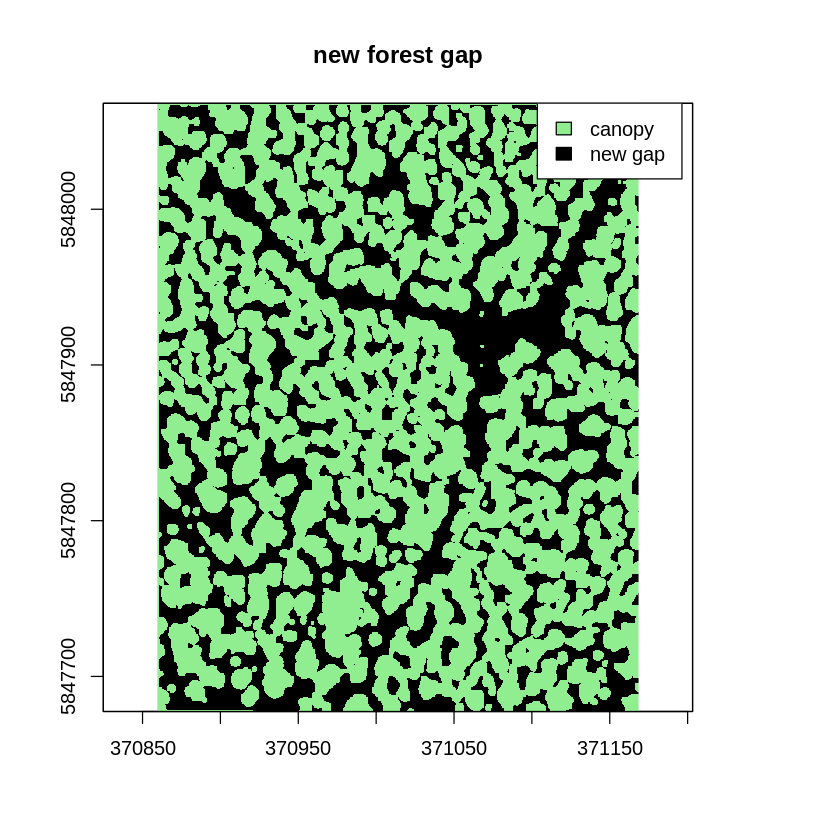

In [777]:
gap2_20m <- gap_mask(DHPCHM,20)
colors <- c("lightgreen", "black")
plot(gap2_20m, main = 'new forest gap', col = colors, legend = FALSE)
legend(x= ext(chm)[2]-65,y = ext(chm)[4], legend = c("canopy", "new gap"), fill = colors)

## 2.4 create Top-Edge enhanced DHPCHM layer

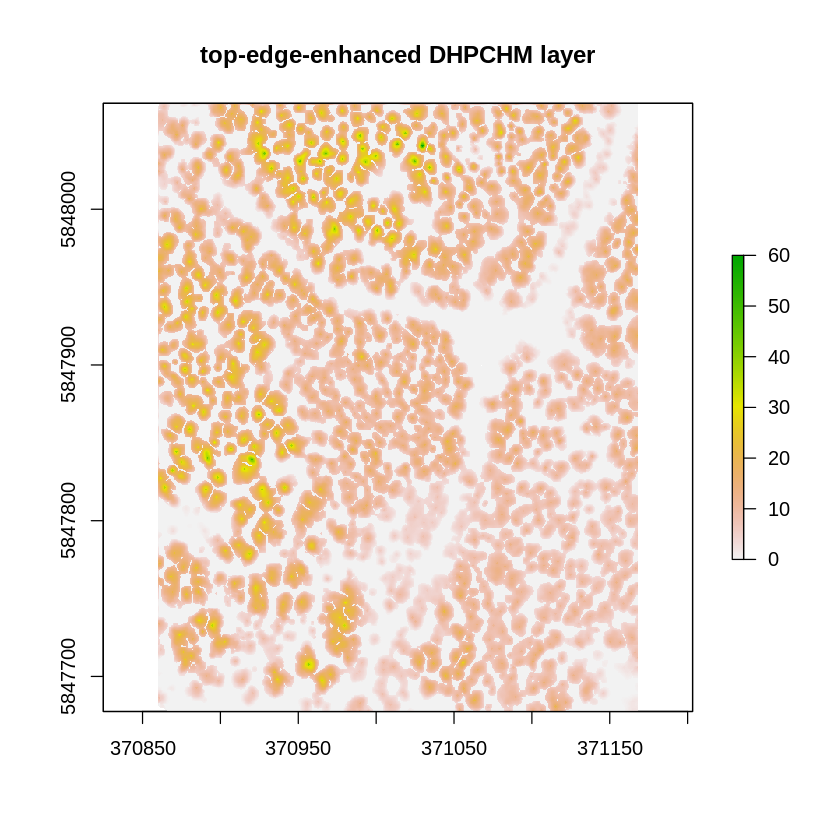

In [778]:
thin_edge[is.na(thin_edge[])] <- 0
WF_DCHM = DHPCHM * 1.2 * ttops_r_fmax + DHPCHM * (1 - gap2_20m) * (1 -thin_edge)* (1 - ttops_r_fmax) #
plot(WF_DCHM,main = 'top-edge-enhanced DHPCHM layer')

# 3 Watershed segmentation to get individual crowns

In [779]:
watershed <- lidR::watershed(chm = WF_DCHM, th_tree = 2)
w_crowns <- watershed()

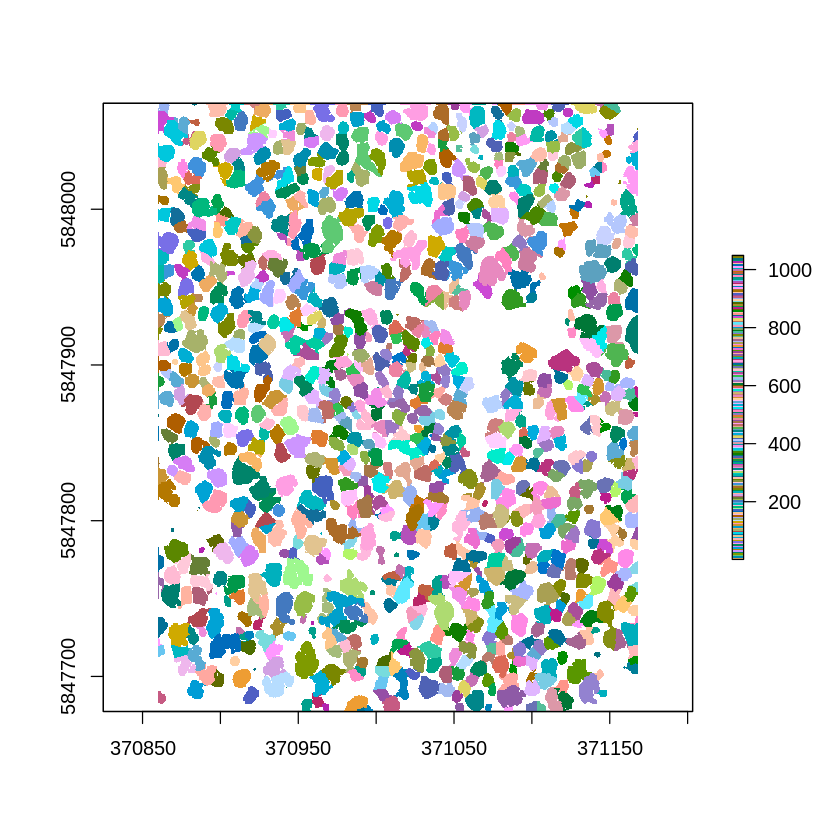

In [780]:
plot(w_crowns, col = pastel.colors(200))

In [781]:
mask_crowns <- mask(w_crowns, gap2_20m, maskvalue=TRUE)
crowns_pol <- rasterToPolygons(mask_crowns,dissolve=TRUE)

In [720]:
writeOGR(crowns_pol,  dsn = outdir, 'C01_watershed_seg_crowns', driver = "ESRI Shapefile",overwrite_layer=T)

Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”


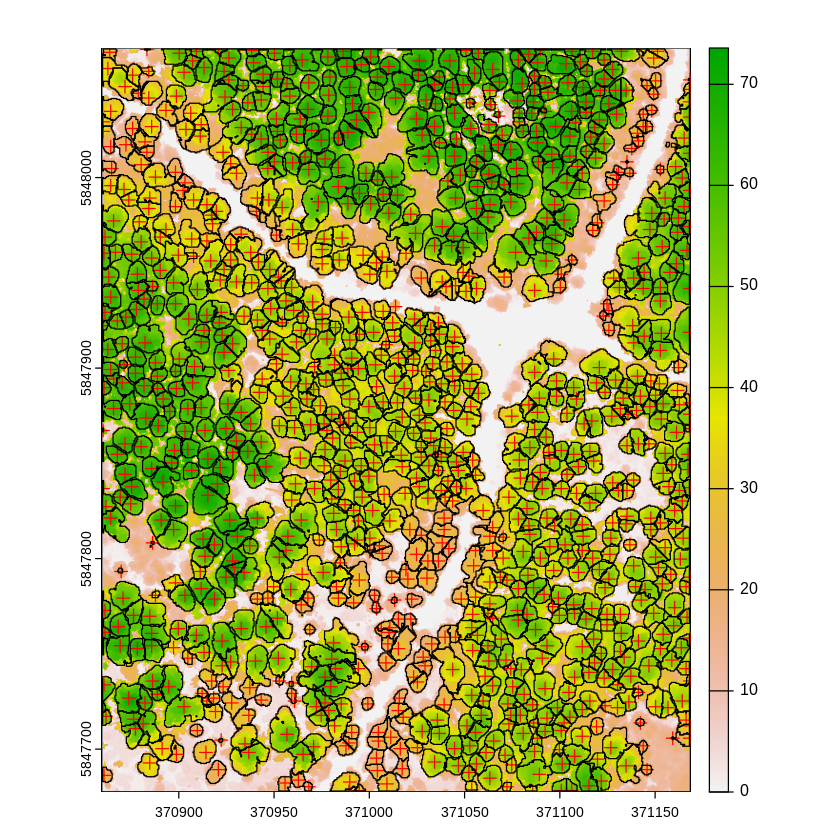

In [782]:
plot(chm)#, col = height.colors(50)
plot(sf::st_geometry(ttops_f), add = TRUE, pch = 3,col='red')
plot(crowns_pol, add = TRUE)

# 4 clip las for study plot and run segmentation

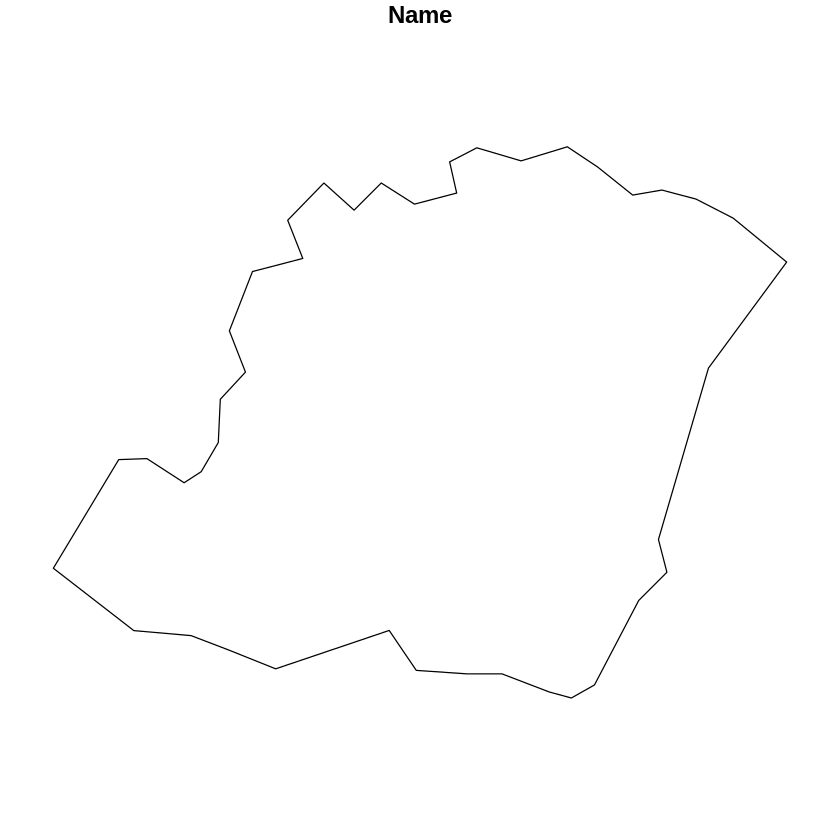

In [783]:
# Load the polygon shapefile
plot1_boundary <- sf::st_read("./data/Plot1_Valid_Cover.shp", quiet = TRUE)
plot(plot1_boundary['Name'])

In [784]:
plot1_boundary_reproj <- sf::st_transform(plot1_boundary, crs = crs(laz))

In [785]:
plot1_las <- clip_roi(laz, plot1_boundary_reproj)

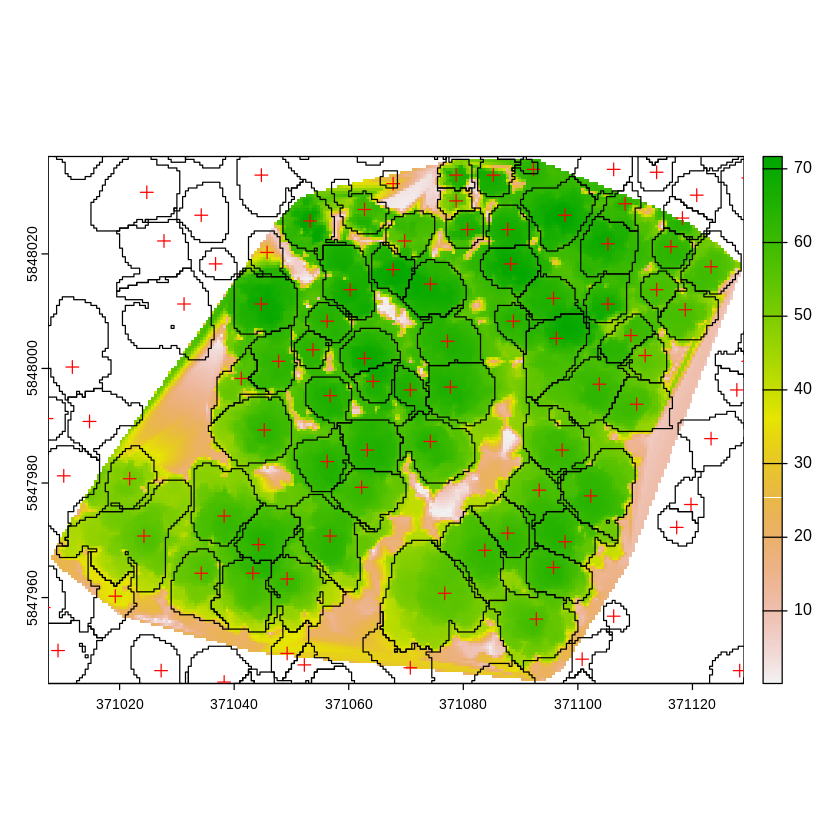

In [786]:
chm_p1 <- rasterize_canopy(plot1_las, 0.5, pitfree(subcircle = 0.2))

plot(chm_p1)#, col = height.colors(50)
plot(sf::st_geometry(ttops_f), add = TRUE, pch = 3,col='red')
plot(crowns_pol, add = TRUE)

# 5 compare with the ground truth stem locations

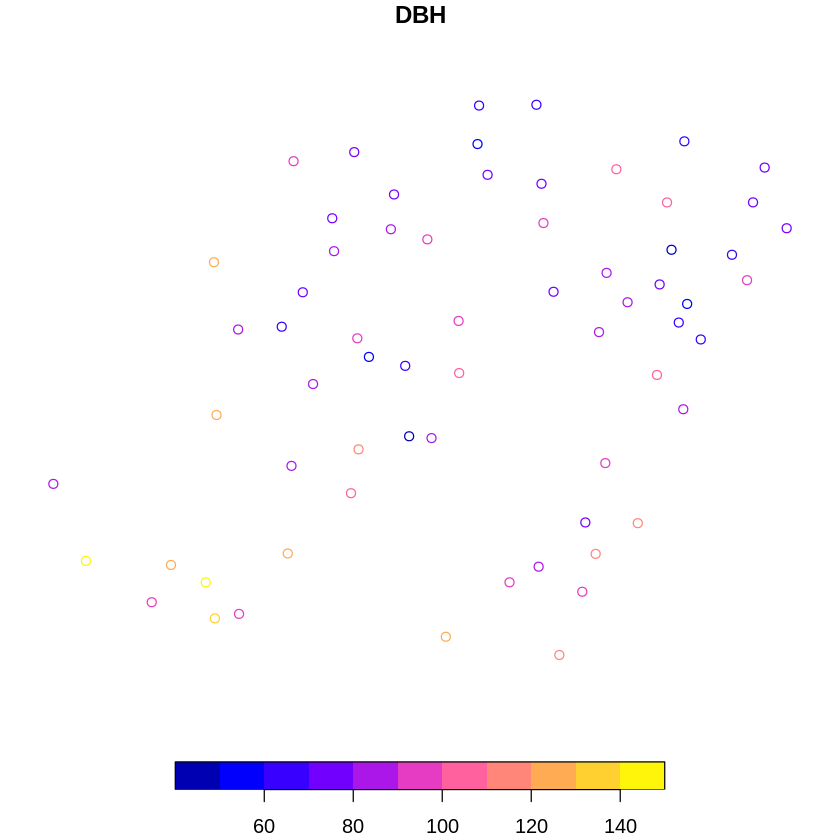

In [787]:
# Load the polygon shapefile
f_tops <- sf::st_read("./field_obs/Plot1_field_ITD_allMeasured_treetop.shp", quiet = TRUE)
plot(f_tops['DBH'])

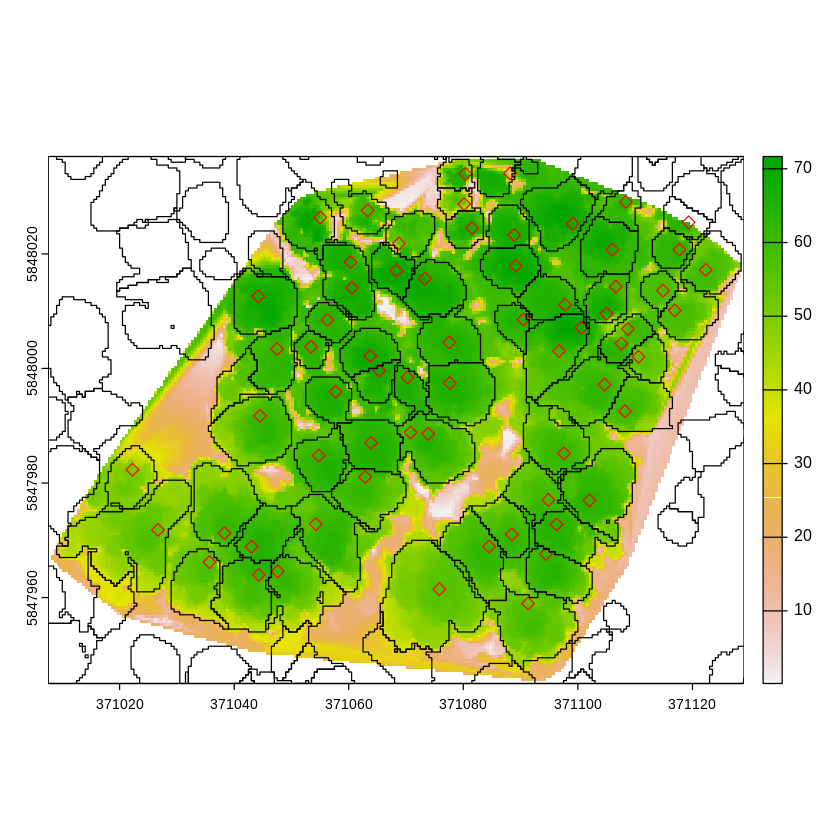

In [788]:
plot(chm_p1)
plot(sf::st_geometry(f_tops), add = TRUE, pch = 5,col='red')
plot(crowns_pol, add = TRUE)